# Metrics

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def get_results_folder():
  results_folder = os.path.join('..', 'assets', 'results')
  fallback_results_folder = 'results'
  if os.path.exists(results_folder):
    return results_folder
  else:
    return fallback_results_folder


def load_results():
  df_results = []
  results_folder = get_results_folder()
  for filename in os.listdir(results_folder):
    model_name = os.path.splitext(filename)[0]
    results_path = os.path.join(results_folder, filename)
    df_result = pd.read_csv(results_path)
    df_result["model"] = model_name
    df_results.append(df_result)
  return pd.concat(df_results)


def plot_results_sliders(df_results, y_scale=None, figsize=(30,5)):
  unique_sliders = df_results["slider"].unique()
  fig, axes = plt.subplots(nrows=1, ncols=len(unique_sliders),figsize=figsize)
  for i,slider in enumerate(unique_sliders):
    ax = axes[i]
    if y_scale != None:
      ax.set_ylim(y_scale[0], y_scale[1])
    df_results[df_results["slider"]==slider].pivot(columns="model",values="accuracy").plot.bar(title=slider, ax=axes[i])

def plot_results(df_results):
  plot_results_sliders(
      df_results[df_results["slider"].isin(['Bright_vs_Dark', 'Full_vs_Hollow', 'Smooth_vs_Rough','Warm_vs_Metallic', 'Clear_vs_Muddy'])], 
      y_scale=(0.0, 1.0))
  plot_results_sliders(
      df_results[df_results["slider"].isin(['Thin_vs_Thick','Pure_vs_Noisy', 'Rich_vs_Sparse', 'Soft_vs_Hard'])], 
      y_scale=(0.0, 1.0))
  

def plot_overall_accuracy(df_results):
  df = df_results[["model","left_correct","left_incorrect","right_correct","right_incorrect"]]
  df = df.groupby("model").sum().reset_index()
  df["accuracy"] = (df["left_correct"] + df["right_correct"]) / (df["left_correct"] + df["right_correct"] + df["left_incorrect"] + df["right_incorrect"])
  df.pivot(columns="model",values="accuracy").plot.bar(title="overall_accuracy")
  return df[["model","accuracy"]]

,model,accuracy
0,WordToWordsPairsMatcher,0.668067


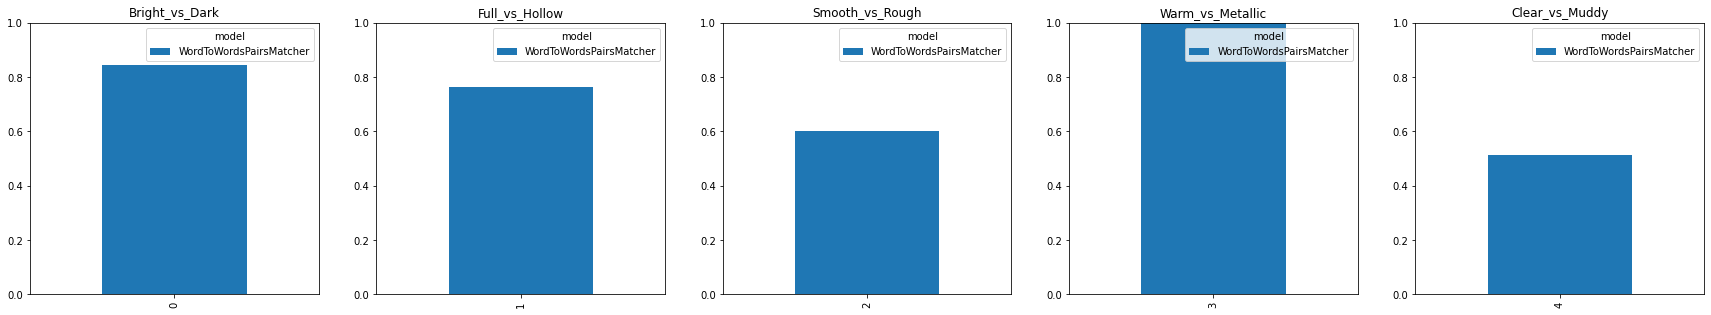

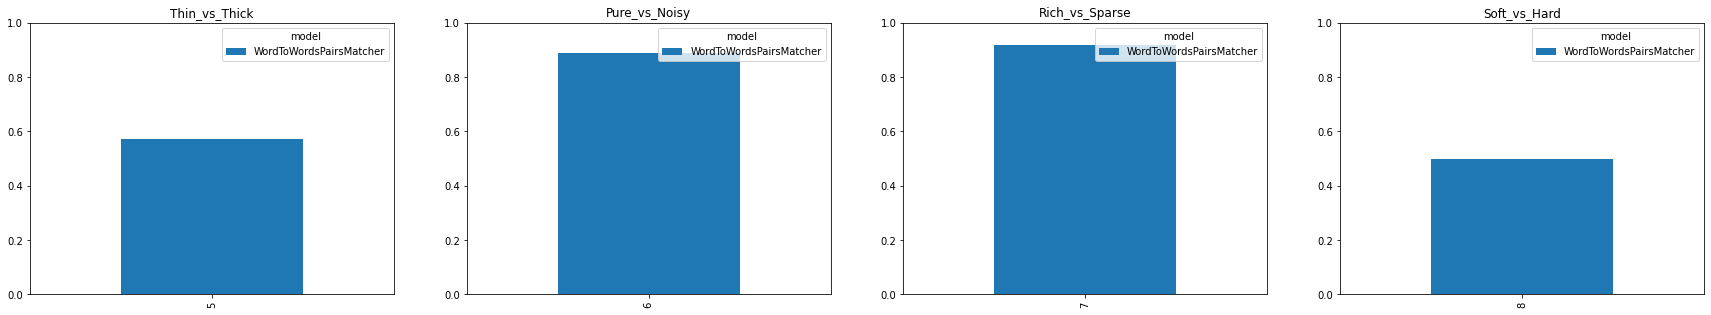

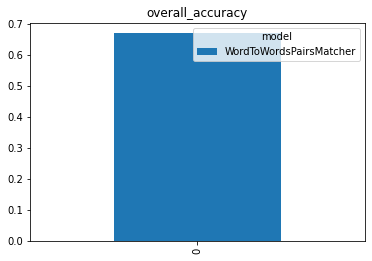

In [5]:
df = load_results()
plot_results(df)
plot_overall_accuracy(df)

In [6]:
df

,slider,left_correct,left_incorrect,right_correct,right_incorrect,accuracy,left_support,right_support,model
0,Bright_vs_Dark,12,0,15,5,0.843750,12,20,WordToWordsPairsMatcher
1,Full_vs_Hollow,12,1,4,4,0.761905,13,8,WordToWordsPairsMatcher
2,Smooth_vs_Rough,16,0,5,14,0.600000,16,19,WordToWordsPairsMatcher
3,Warm_vs_Metallic,9,0,1,0,1.000000,9,1,WordToWordsPairsMatcher
4,Clear_vs_Muddy,1,19,19,0,0.512821,20,19,WordToWordsPairsMatcher
5,Thin_vs_Thick,2,14,18,1,0.571429,16,19,WordToWordsPairsMatcher
6,Pure_vs_Noisy,16,2,0,0,0.888889,18,0,WordToWordsPairsMatcher
7,Rich_vs_Sparse,11,1,0,0,0.916667,12,0,WordToWordsPairsMatcher
8,Soft_vs_Hard,16,1,2,17,0.500000,17,19,WordToWordsPairsMatcher


# Dev

In [6]:
df_dummy = df.copy()
df_dummy["model"] = "dummy"
for c in ["left_correct","left_incorrect","right_correct","right_incorrect","left_support","right_support"]:
  df_dummy[c] = (df_dummy[c]/2).astype(int)
df_dummy["accuracy"] = df_dummy["accuracy"]/2
df = pd.concat([df,df_dummy])
df

,slider,left_correct,left_incorrect,right_correct,right_incorrect,accuracy,left_support,right_support,model
0,Bright_vs_Dark,12,0,15,5,0.843750,12,20,WordToWordsPairsMatcher
1,Full_vs_Hollow,12,1,4,4,0.761905,13,8,WordToWordsPairsMatcher
2,Smooth_vs_Rough,16,0,5,14,0.600000,16,19,WordToWordsPairsMatcher
3,Warm_vs_Metallic,9,0,1,0,1.000000,9,1,WordToWordsPairsMatcher
4,Clear_vs_Muddy,1,19,19,0,0.512821,20,19,WordToWordsPairsMatcher
5,Thin_vs_Thick,2,14,18,1,0.571429,16,19,WordToWordsPairsMatcher
6,Pure_vs_Noisy,16,2,0,0,0.888889,18,0,WordToWordsPairsMatcher
7,Rich_vs_Sparse,11,1,0,0,0.916667,12,0,WordToWordsPairsMatcher
8,Soft_vs_Hard,16,1,2,17,0.500000,17,19,WordToWordsPairsMatcher
0,Bright_vs_Dark,6,0,7,2,0.421875,6,10,dummy


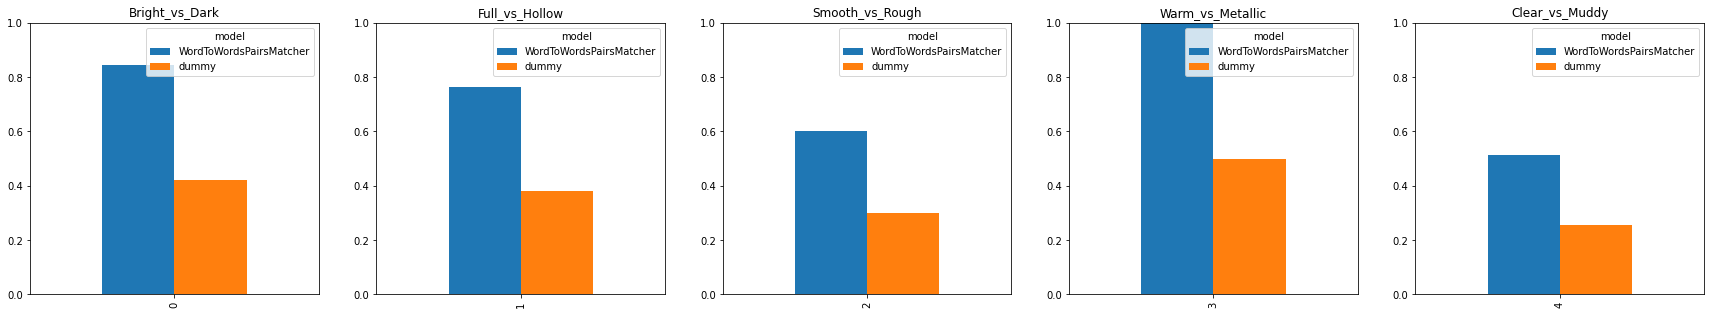

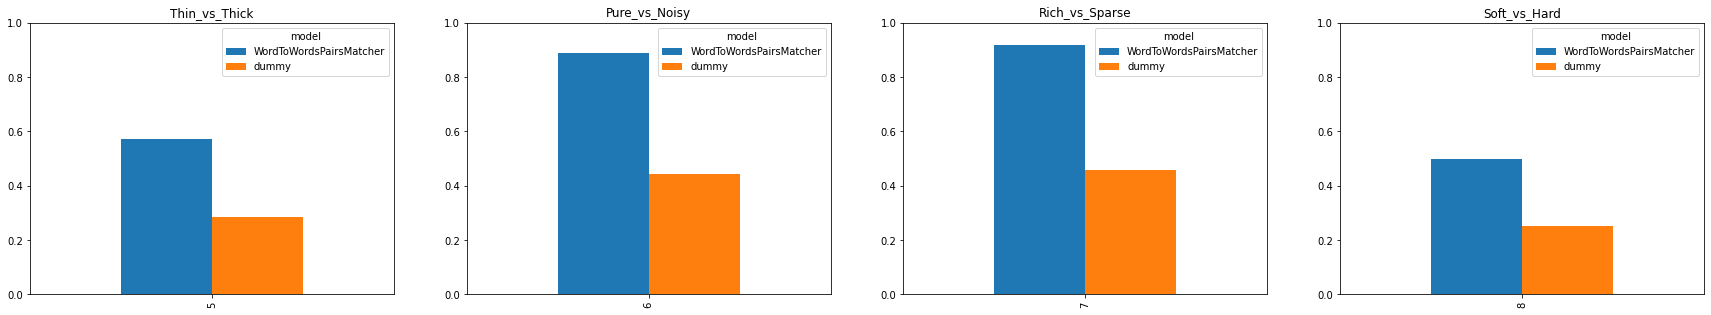

In [14]:


plot_results(df)

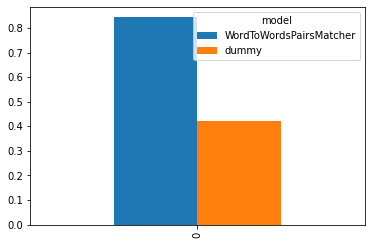

In [9]:
df[df["slider"]=="Bright_vs_Dark"].pivot(columns="model",values="accuracy").plot.bar()

In [11]:
df["slider"].unique()

array(['Bright_vs_Dark', 'Full_vs_Hollow', 'Smooth_vs_Rough',
       'Warm_vs_Metallic', 'Clear_vs_Muddy', 'Thin_vs_Thick',
       'Pure_vs_Noisy', 'Rich_vs_Sparse', 'Soft_vs_Hard'], dtype=object)

,model,accuracy
0,WordToWordsPairsMatcher,0.668067
1,dummy,0.678571


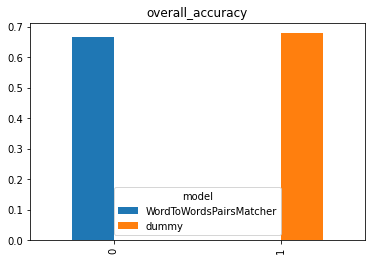

In [16]:
def plot_overall_accuracy(df_results):
  df = df_results[["model","left_correct","left_incorrect","right_correct","right_incorrect"]]
  df = df.groupby("model").sum().reset_index()
  df["accuracy"] = (df["left_correct"] + df["right_correct"]) / (df["left_correct"] + df["right_correct"] + df["left_incorrect"] + df["right_incorrect"])
  df.pivot(columns="model",values="accuracy").plot.bar(title="overall_accuracy")
  return df[["model","accuracy"]]

plot_overall_accuracy(df)